# **Customer Lifetime Value**
****

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Customer Lifetime Value (CLV) merupakan indikator yang menunjukkan nilai pelanggan bagi perusahaan. Melalui CLV, perusahaan dapat mengetahui potensi keuntungan dari setiap pelanggan serta mengukur biaya yang dikeluarkan untuk mendapatkan pelanggan baru atau mempertahankan yang sudah ada. Data ini penting bagi perusahaan untuk mengarahkan strategi pemasaran secara lebih efektif kepada pelanggan bernilai tinggi dan memahami perubahan perilaku pelanggan di masa mendatang.

Perusahaan asuransi menghasilkan pendapatan dari premi asuransi yang dibayarkan oleh pelanggan serta dari hasil aktivitas investasinya. Walaupun tidak semua pelanggan mengajukan klaim, ada persentase tertentu yang harus dipenuhi oleh perusahaan sesuai ketentuan polis. Untuk meningkatkan margin keuntungan, perusahaan cenderung fokus pada upaya meningkatkan pendapatan premi karena jumlah klaim yang diajukan pelanggan tidak dapat sepenuhnya dikendalikan. Strategi pemasaran yang efektif dan tepat sasaran menjadi kunci untuk mendorong peningkatan penjualan premi.


**Problem Statement**

Sebuah perusahaan asuransi kendaraan bermotor berupaya meningkatkan pendapatan dengan strategi pemasaran yang berfokus pada retensi pelanggan. Untuk memastikan kegiatan pemasaran yang dilakukan tepat sasaran, promosi atau penawaran perlu diarahkan kepada pelanggan yang sesuai. Hal ini dapat dilakukan dengan memanfaatkan Customer Lifetime Value (CLV). CLV mengukur total pendapatan yang diharapkan dapat diperoleh perusahaan dari seorang pelanggan selama masa loyalitasnya. Secara matematis, CLV dihitung dengan mengalikan rata-rata nilai pembelian, frekuensi pembelian, dan rata-rata retensi pelanggan dalam satuan tahun. Dengan memahami faktor-faktor yang memengaruhi CLV, seperti karakteristik pelanggan atau jenis layanan asuransi yang digunakan, perusahaan dapat merancang strategi pemasaran yang lebih efektif dan terarah.

**Goals**

Untuk mengatasi permasalahan tersebut, dirancang sebuah model machine learning yang bertujuan memprediksi nilai Customer Lifetime Value (CLV) berdasarkan data profil pelanggan dan jenis layanan asuransi yang dipilih. Nilai CLV yang dihasilkan dari model ini akan menjadi acuan bagi perusahaan asuransi dalam merancang strategi promosi yang sesuai dengan kebutuhan dan potensi masing-masing pelanggan. Dengan demikian, perusahaan dapat lebih efektif dalam mengalokasikan anggaran pemasaran, meningkatkan transaksi pelanggan, dan pada akhirnya, mendorong pertumbuhan pendapatan perusahaan secara keseluruhan.

**Analytic Approach**

Sebelum membuat model, akan dilakukan analisis berdasarkan domain knowledge dan pendekatan statistik untuk menemukan pola dari fitur-fitur yang ada, yang kemungkinan berpengaruh terhadap nilai CLV yang dimiliki pelanggan. Kemudian akan dibuat berbagai model regresi untuk memprediksi nilai CLV, dan akhirnya model terbaik akan dipilih dari model yang memiliki nilai evaluation metrics terbaik dan digunakan sebagai final model.

**Metric Evaluation**

Evaluation metrics memiliki peran penting dalam pemodelan, karena membantu menilai kinerja model sekaligus mempermudah interpretasi hasil. Untuk model regresi, kinerja dapat diukur dengan mengevaluasi tingkat kesalahan (error) antara nilai aktual dan nilai prediksi yang dihasilkan oleh model. Semakin kecil perbedaan antara nilai aktual dan prediksi, semakin baik kinerja model regresi tersebut. Metrics seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), atau Root Mean Squared Error (RMSE) sering digunakan untuk mengukur tingkat error ini, sehingga dapat memberikan gambaran tentang akurasi dan keandalan model.

### **Data Understanding**

- Dataset merupakan data nilai CLV, profil pelanggan dan layanan asuransi yang dipilih dari sebuah perusahaan asuransi mobil.
- Dataset memiliki 11 kolom dan 5669 baris.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehice Class | Object | Jenis/Tipe Mobil |
| Coverage | Object | Jenis proteksi asuransi yang dipilih |
| Renew Offer Type | Object | Tipe pembaruan asuransi yang dipilih saat periode polis berakhir |
| Employment Status | Object | Status pekerjaan |
| Marital Status | Object | Status pernikahan |
| Education | Object | Tingkat pendidikan terakhir |
| Number of Policies | Float | Jumlah polis yang diambil |
| Monthly Premium Auto | Float | Jumlah premi yang dibayarkan setiap bulan (USD) |
| Total Claim Amount | Float | Total klaim yang telah dibayarkan asuransi kepada pelanggan (USD) |
| Income | Float | Pendapatan pelanggan |
| Customer Lifetime Value | Float | Nilai CLV pelanggan |

<br>

In [36]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data splitting
from sklearn.model_selection import train_test_split

# Library preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Library untuk missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Library untuk scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# Cross Validation 
from sklearn.model_selection import cross_val_score

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Data splitting
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### **Load Dataset**

In [2]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


### **Exploratory Data Analysis**

**Distribution of CLV**

In [4]:
df['Customer Lifetime Value'].describe()

count     5669.000000
mean      8029.874592
std       6916.708246
min       1898.007675
25%       3954.344534
50%       5800.188903
75%       9031.214859
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Text(0.5, 1.0, 'CLV Distribution Plot')

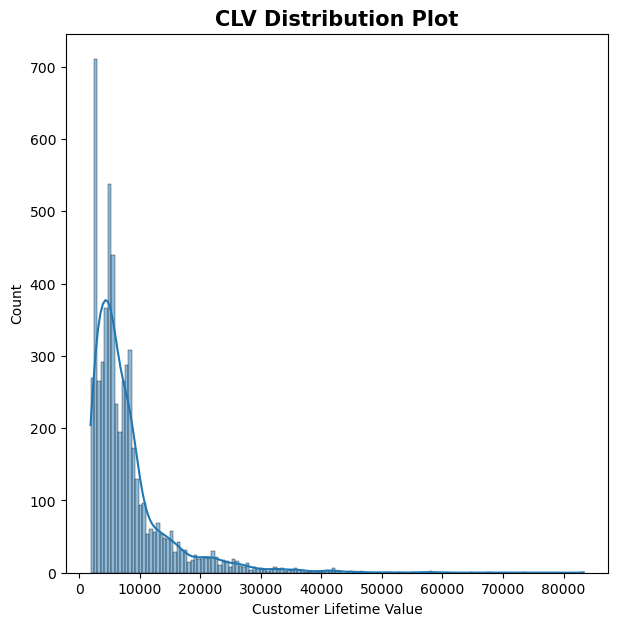

In [5]:
plt.figure(figsize=(7, 7))
sns.histplot(df['Customer Lifetime Value'], kde=True)
plt.title('CLV Distribution Plot', size=15, weight='bold')

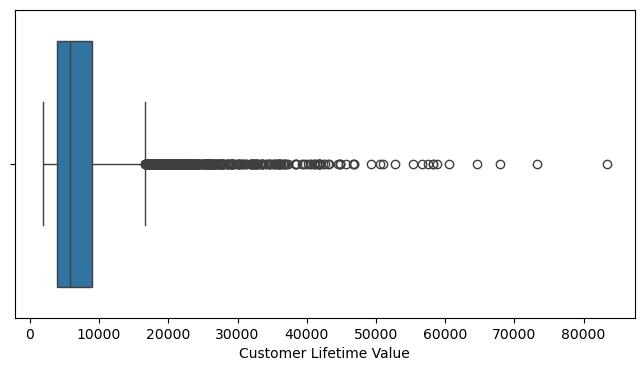

In [6]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['Customer Lifetime Value'], orient='h')
plt.show()

In [7]:
df[['Customer Lifetime Value']].describe()

,Customer Lifetime Value
count,5669.000000
mean,8029.874592
std,6916.708246
min,1898.007675
25%,3954.344534
50%,5800.188903
75%,9031.214859
max,83325.381190


- Berdasarkan plot distribusi CLV di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur Customer Lifetime Value.
- Berdasarkan boxplot terlihat bahwa variabel CLV memiliki banyak outlier. Namun karena CLV merupakan variabel target sehingga outlier tidak dapat dihilangkan untuk mengurangi bias dari hasil perhitungan model.
- CLV memiliki range data dari USD 1898 - 83325.38, dengan mean USD 8029.87 yang nilainya lebih besar dibanding mediannya USD 5837.53 (mengindikasikan right-skewed distribution).

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

In [8]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Luxury SUV, SUV]"
1,Coverage,object,0,0.0,3,"[Extended, Basic]"
2,Renew Offer Type,object,0,0.0,4,"[Offer4, Offer3]"
3,EmploymentStatus,object,0,0.0,5,"[Medical Leave, Retired]"
4,Marital Status,object,0,0.0,3,"[Divorced, Single]"
5,Education,object,0,0.0,5,"[High School or Below, Doctor]"
6,Number of Policies,float64,0,0.0,9,"[7.0, 1.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[148.0, 130.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[227.225113, 525.6]"
9,Income,float64,0,0.0,3625,"[76505.0, 20269.0]"


Berdasarkan info di atas, dalam dataset ini tidak terdapat missing value sehingga tidak perlu dilakukan perlakuan apapun.

**Drop Duplicate**

In [9]:
# Melihat apakah terdapat data duplikat

df.duplicated().sum()

618

Terdapat 618 baris data duplikat dari total 5669 baris. Meskipun jumlahnya cukup signifikan, penghapusan data duplikat tetap diperlukan. Hal ini karena data duplikat dapat mengganggu proses pemisahan data (splitting), sehingga data training dan testing bisa saja memiliki baris yang identik, yang berisiko menyebabkan information leakage dan bias dalam hasil prediksi.

In [10]:
# Menghapus data duplikat

df.drop_duplicates(inplace=True)

In [11]:
# Melihat ulang keberadaan data duplikat

df.duplicated().sum()

0

In [12]:
df.shape

(5051, 11)

Sekarang sudah tidak terdapat duplikat dalam dataset dan jumlah baris data berkurang menjadi 5051 baris.

**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Fitur Renew Offer Type dinilai kurang relevan untuk digunakan dalam modelling karena kita tidak mendapat informasi mengenai perbedaan tiap Offer sehingga akan kekurangan informasi dalam menginterpretasikannya.

In [13]:
# Drop kolom yang tidak relevan

df.drop(['Renew Offer Type'], axis=1, inplace=True)

**Data Correlation**

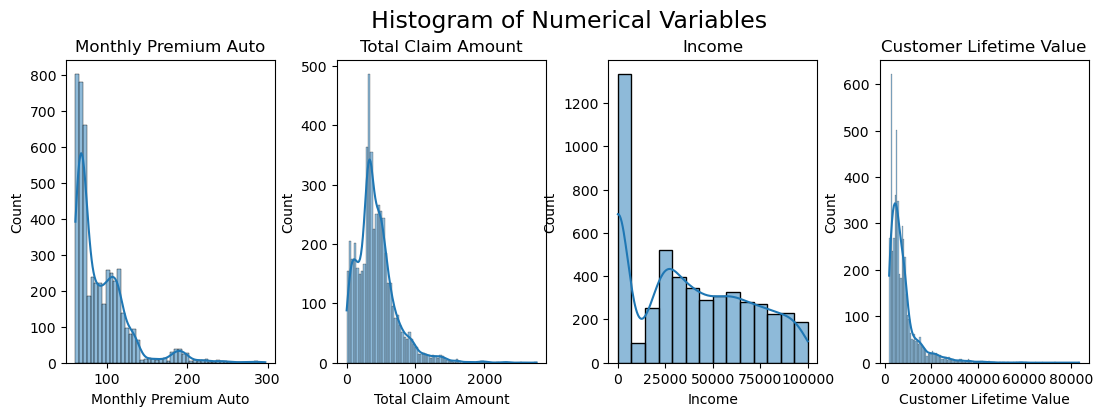

In [14]:
fig, axs =  plt.subplots(1, 4, figsize=(11, 4), facecolor = "none")
numeric = ["Monthly Premium Auto", "Total Claim Amount", "Income", "Customer Lifetime Value"]
fig.suptitle("Histogram of Numerical Variables", size = 17)
fig.tight_layout()

pos = 0
for i in df[numeric].columns:
    sns.histplot(df[i], ax = axs[pos], kde = True)
    axs[pos].set_title(i)
    pos +=1

Text(0.5, 1.0, 'Hubungan antara Total Claim Amount dan CLV')

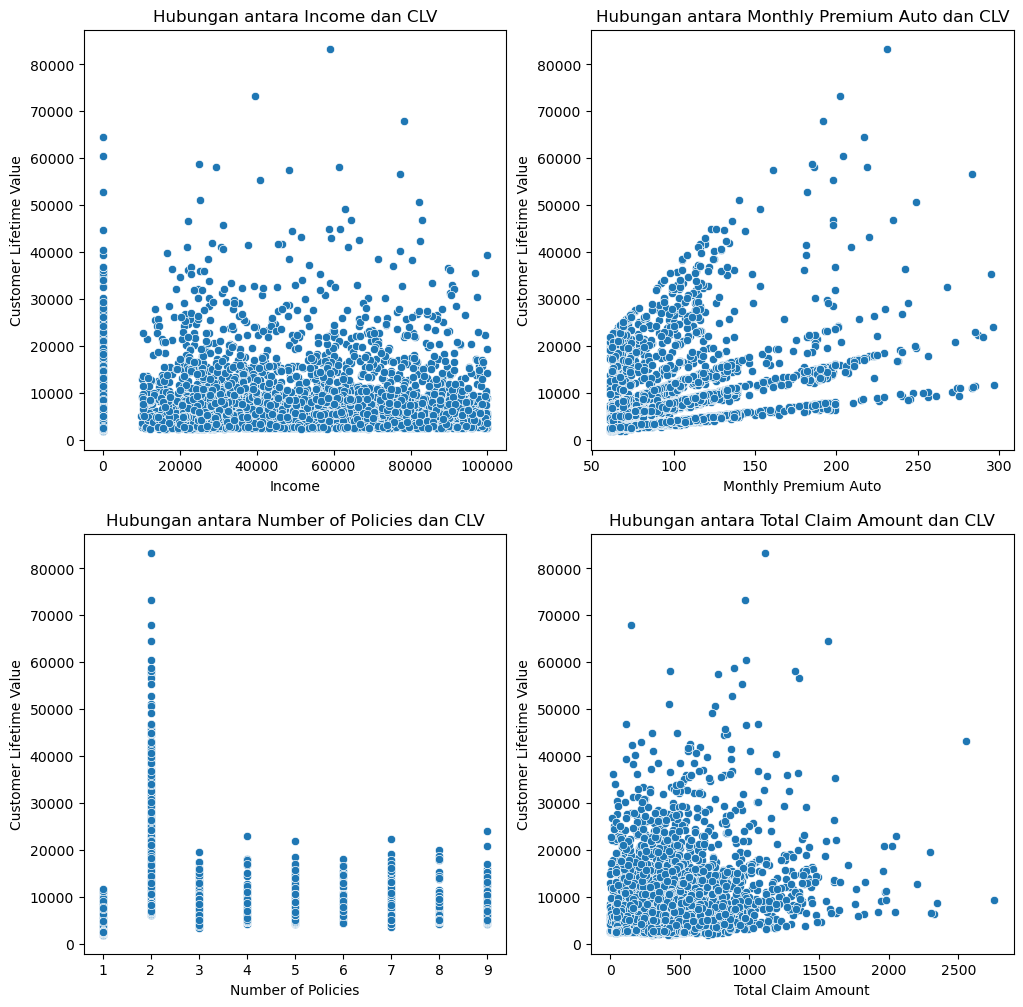

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

sns.scatterplot(y=df['Customer Lifetime Value'], x=df['Income'], ax=axes[0,0]).set_title('Hubungan antara Income dan CLV')
sns.scatterplot(y=df['Customer Lifetime Value'], x=df['Monthly Premium Auto'], ax=axes[0,1]).set_title('Hubungan antara Monthly Premium Auto dan CLV')
sns.scatterplot(y=df['Customer Lifetime Value'], x=df['Number of Policies'], ax=axes[1,0]).set_title('Hubungan antara Number of Policies dan CLV')
sns.scatterplot(y=df['Customer Lifetime Value'], x=df['Total Claim Amount'], ax=axes[1,1]).set_title('Hubungan antara Total Claim Amount dan CLV')

Text(0.5, 1.0, 'Correlation Matrix')

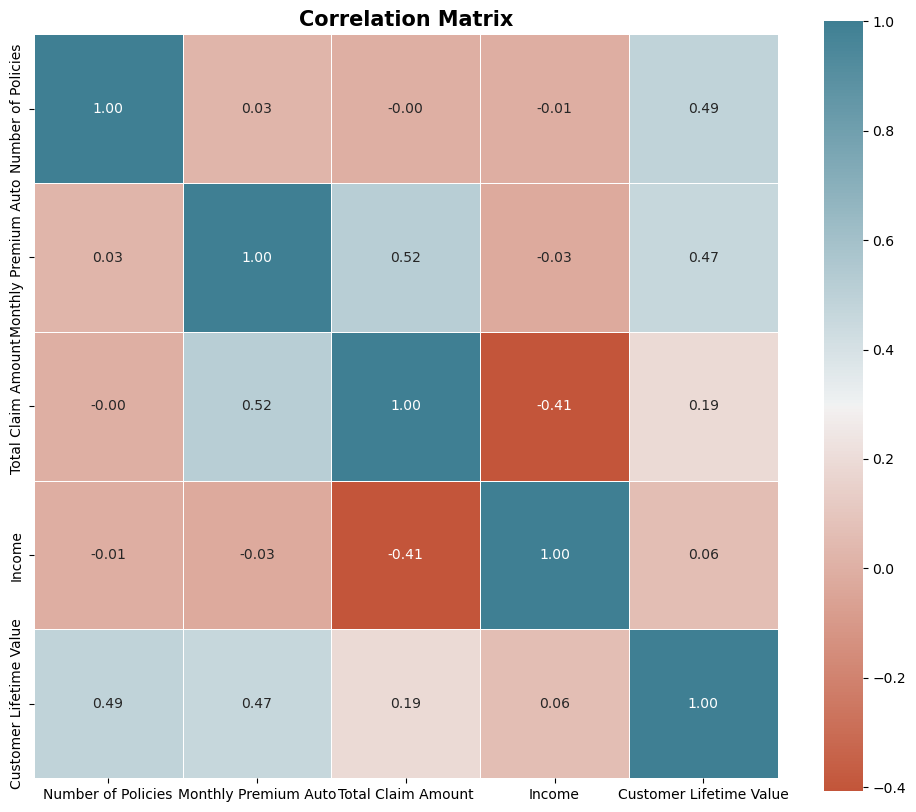

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 10))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

Berdasarkan correlation matrix diatas dapat terlihat bahwa fitur Number of Policies dan Monthly Premium Auto memiliki korelasi paling kuat dengan nilai CLV. Sedangkan untuk fitur Total Claim Amount, dan Income korelasinya tidak begitu kuat (nilai korelasi mendekati 0).

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

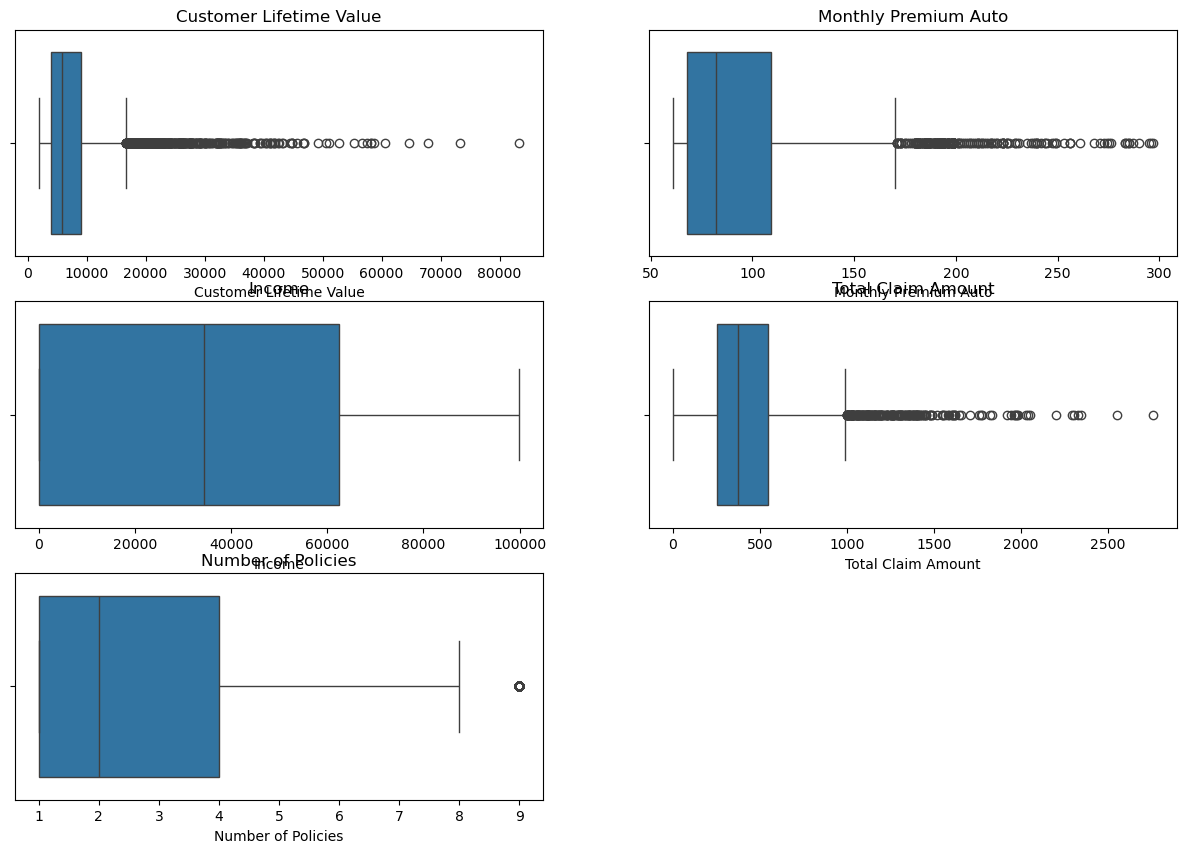

In [17]:
# Plot boxplot untuk mengecek outliers
fig, axes = plt.subplots(3, 2, figsize=(15,10))

sns.boxplot(df['Customer Lifetime Value'], orient='h', ax = axes[0,0]).set_title('Customer Lifetime Value')
sns.boxplot(df['Monthly Premium Auto'], orient='h', ax = axes[0,1]).set_title('Monthly Premium Auto')
sns.boxplot(df['Income'], orient='h', ax = axes[1,0]).set_title('Income')
sns.boxplot(df['Total Claim Amount'], orient='h', ax = axes[1,1]).set_title('Total Claim Amount')
sns.boxplot(df['Number of Policies'], orient='h', ax = axes[2,0]).set_title('Number of Policies')
fig.delaxes(axes[2,1])

Fitur Monthly Premium Auto, Total Claim Amount, dan CLV memiliki outlier. Di sisi lain, fitur Income tidak menunjukkan adanya outlier, sedangkan fitur Number of Policies memiliki satu outlier. Namun, tidak dilakukan penanganan pada fitur ini karena jumlah outlier yang minim. Berikutnya, mari kita analisis jumlah outlier pada masing-masing fitur.

In [18]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')       

In [19]:
# Outliers pada fitur Monthly Premium Auto
find_anomalies(df['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [20]:
# Outliers pada fitur Total Claim Amount
find_anomalies(df['Total Claim Amount'])

IQR: 296.34681750000004
limit_bawah: -192.74392225000005
limit_atas: 992.6433477500001


In [21]:
# Outliers pada fitur Customer Lifetime Value
find_anomalies(df['Customer Lifetime Value'])

IQR: 5064.1236284999995
limit_bawah: -3631.744438749999
limit_atas: 16624.75007525


In [22]:
# Menghitung jumlah outlier pada setiap fitur

outlier_CLV = df[df['Customer Lifetime Value'] > 16624.75007525].count()['Customer Lifetime Value']
outlier_premi = df[df['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']
outlier_claim = df[df['Total Claim Amount'] > 992.6433477500001].count()['Total Claim Amount']

print('Jumlah outlier pada fitur Customer Lifetime Value:', outlier_CLV, 'atau sebesar', ((outlier_CLV)/(df.shape[0])*100).round(2), '% dari keseluruhan data')
print('Jumlah outlier pada fitur Monthly Premium Auto:', outlier_premi, 'atau sebesar', ((outlier_premi)/(df.shape[0])*100).round(2), '% dari keseluruhan data')
print('Jumlah outlier pada fitur Total Claim Amount:', outlier_claim, 'atau sebesar', ((outlier_claim)/(df.shape[0])*100).round(2), '% dari keseluruhan data')

Jumlah outlier pada fitur Customer Lifetime Value: 449 atau sebesar 8.89 % dari keseluruhan data
Jumlah outlier pada fitur Monthly Premium Auto: 252 atau sebesar 4.99 % dari keseluruhan data
Jumlah outlier pada fitur Total Claim Amount: 217 atau sebesar 4.3 % dari keseluruhan data


Outlier dapat mengganggu analisis statistik dan memengaruhi hasil prediksi, sehingga seringkali dilakukan penghapusan outlier. Penghapusan ini biasanya dilakukan jika outlier muncul akibat kesalahan dalam proses pengambilan atau input data. Namun, terdapat pula outlier alami (natural outlier) yang muncul karena variasi karakteristik data. Dalam kasus ini, outlier tidak dihapus karena dapat memengaruhi pemahaman kita terhadap data sebenarnya.

Setelah dilakukan analisis, diketahui bahwa total outlier pada ketiga fitur tersebut mencapai 18,18% dari seluruh data. Berdasarkan domain knowledge, outlier pada ketiga fitur tersebut dianggap sebagai outlier alami. Dengan mempertimbangkan proporsi data dan sifat outlier tersebut, tidak dilakukan penanganan khusus agar tetap mendapatkan gambaran yang utuh tentang kondisi pelanggan.

### **Encoding**

Agar dapat digunakan dalam pemodelan regresi, fitur kategorikal perlu diubah menjadi fitur numerikal dengan melakukan encoding.

In [23]:

cat_cols = df.select_dtypes(include='object')

cat_cols.describe()

,Vehicle Class,Coverage,EmploymentStatus,Marital Status,Education
count,5051,5051,5051,5051,5051
unique,6,3,5,3,5
top,Four-Door Car,Basic,Employed,Married,Bachelor
freq,2565,3100,3187,2986,1529


Terdapat 5 fitur kategorikal, dan encoding yang akan dilakukan adalah sebagai berikut:

1. One hot Encoding: Coverage dan Marital Status. Pada kedua fitur ini dipilih one hot encoding karena jumlah unique number-nya relatif sedikit.
2. Ordinal Encoding: Education. Dilakukan ordinal encoding karena fitur Education memiliki urutan dalam hal ini jenjang pendidikan.
3. Binary Encoding: Vehicle Class dan EmploymentStatus. Pada kedua fitur ini dilakukan binary encoding karena jumlah fiturnya cukup banyak dan tidak memiliki urutan data.

In [24]:
onehot_var = ['Coverage', 'Marital Status']
onehot = OneHotEncoder(drop='first')

ordinal_var = ['Education']
ordinal_mapping = [{
    'col':'Education',
    'mapping' : {'High School or Below':0, 'College':1, 'Bachelor':2, 'Master':3, 'Doctor':4}
}]
ordinal = ce.OrdinalEncoder(cols=ordinal_var, mapping=ordinal_mapping)

binary_var = ['Vehicle Class', 'EmploymentStatus']
binary = ce.BinaryEncoder()

In [25]:
transformer = ColumnTransformer([
    ('one hot encoder', onehot, onehot_var),
    ('ordinal encoder', ordinal, ordinal_var),
    ('binary', binary, binary_var)],
      remainder='passthrough')

### **Define X and y**

In [26]:
# Define fitur dan target

X = df.drop(['Customer Lifetime Value'], axis=1)
y = df['Customer Lifetime Value']

### **Data Splitting**

In [27]:
# Splitting data training + validasi dan test

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

### **Choose Benchmark Model**

In [33]:
# Define algoritma model
linreg = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2023)
rf = RandomForestRegressor(random_state=2023)
ada = AdaBoostRegressor(random_state=2023)
gb = GradientBoostingRegressor(random_state=2023)
xgb = XGBRegressor(random_state=2023)

# Scaler
scaler = RobustScaler()

# Kandidat algoritma
models = [linreg, knn, dt, rf, ada, gb, xgb]

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Mencari algoritma terbaik berdasarkan tiap metrics dengan default parameter
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # R-square
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-4049.62730739 -3832.27613544 -3681.35508071 -3952.71675136
 -4109.49461975] LinearRegression()
[-6443.88506439 -6067.54296438 -5678.28235112 -6520.20796806
 -6765.60899497] LinearRegression()
[-0.6288047  -0.59468231 -0.59551154 -0.60231969 -0.59030446] LinearRegression()
[0.11485416 0.20465038 0.18242455 0.1857381  0.16473259] LinearRegression()
[-3933.45293826 -3506.91095365 -3472.24348583 -3776.76303107
 -3902.18254498] KNeighborsRegressor()
[-6716.46324849 -6105.55986631 -5843.2084117  -6837.25256815
 -6809.69870418] KNeighborsRegressor()
[-0.55110589 -0.48527551 -0.49643401 -0.50433432 -0.51569367] KNeighborsRegressor()
[0.03838651 0.19465244 0.13424177 0.10462603 0.15381068] KNeighborsRegressor()
[-2110.63071642 -2068.74840612 -1891.45356113 -2088.39825186
 -1953.10520902] DecisionTreeRegressor(random_state=2023)
[-5758.71684062 -5713.73588761 -5401.2463736  -5837.87104753
 -5069.13437834] DecisionTreeRegressor(random_state=2023)
[-0.15998933 -0.14844465 -0.13735504 -0.1512412 

In [34]:
# Evaluasi hasil dari kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'GradientBoosting Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_r2': nilai_mean_r2,
    'Std_r2': nilai_std_r2
}).sort_values(by='Mean_MAE', ascending=False)

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE,Mean_MAPE,Std_MAPE,Mean_r2,Std_r2
3,RandomForest Regressor,-1704.629678,70.980218,-4104.787439,227.862855,-0.125208,0.003299,0.645137,0.039578
5,GradientBoosting Regressor,-1784.757192,85.447616,-3934.797361,256.243846,-0.149057,0.003526,0.675999,0.014313
2,DecisionTree Regressor,-2022.467229,85.132037,-5556.140906,285.100942,-0.145916,0.009846,0.345276,0.097001
6,XGBoost Regressor,-2185.320713,65.397965,-4342.950584,214.308951,-0.227704,0.007345,0.603239,0.037069
1,KNN Regressor,-3718.310591,194.293922,-6462.436560,409.001728,-0.510569,0.022574,0.125143,0.052314
0,Linear Regression,-3925.093979,153.817402,-6295.105469,381.165456,-0.602325,0.013788,0.170480,0.030563
4,AdaBoost Regressor,-4055.867531,878.205623,-5454.972532,668.949312,-0.538452,0.155356,0.352019,0.188237



Berdasarkan nilai MAE, RMSE, dan r-square, model yang memiliki nilai evaluation metrics terbaik adalah Random Forest Regressor dan Gradient Boosting Regressor dengan nilai MAE dan RMSE yang paling rendah serta nilai r2 yang tertinggi dibandingkan model lainnya.

### **Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model Random Forest Regressor GradientBoosting Regressor

In [38]:
# Benchmark 2 model terbaik
models = {
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
GradientBoosting,4062.144649,1792.479156,0.146344
RandomForest,4157.983854,1724.812577,0.128445


Setelah melakukan prediksi pada test data, terlihat bahwa model RandomForest memiliki score MAE dan MAPE yang lebih bagus walaupun RMSE nya memiliki score lebih baik pada GradientBoosting walaupun tidak signifikan, maka selanjutnya model RandomForest akan digunakan sebagai model akhir.

### **Hyperparameter Tuning**

Karena model RandomForest memiliki performa yang sedikit lebih baik dari GradientBoosting, maka selanjutnya kita akan menggunakan model RandomForest ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model RandomForest dengan harapan dapat meningkatkan performa model.

In [39]:
# Hyperparam space RandomForest
hyperparam_space_rf = {
    'model__max_depth': list(np.arange(1, 11)), 
    'model__n_estimators': list(np.arange(100, 201)),
    'model__criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

In [40]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    n_iter = 500,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

In [41]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot '
                                                                               'encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Coverage',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal '
                                                                               'encoder',
                                                                               OrdinalEncoder(cols=['Education'],
                                                                                              mapping=[{'col': 'Education',
                                                                                                        'data_type': dtype('...
                                                             'poisson'],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [42]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__max_depth,param_model__criterion,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
149,48.052403,3.085775,0.059197,0.008239,131,7,absolute_error,"{'model__n_estimators': 131, 'model__max_depth...",-4321.473728,-3844.511654,...,97.396044,1,-0.095399,-0.095879,-0.095288,-0.094370,-0.103606,-0.096908,0.003384,1
213,72.773474,2.937595,0.079777,0.015681,198,7,absolute_error,"{'model__n_estimators': 198, 'model__max_depth...",-4334.829526,-3830.671373,...,101.139880,2,-0.096329,-0.095214,-0.094916,-0.094683,-0.103671,-0.096962,0.003401,3
317,76.601082,1.674252,0.156803,0.079146,150,7,absolute_error,"{'model__n_estimators': 150, 'model__max_depth...",-4321.906929,-3853.454232,...,97.377934,3,-0.095801,-0.095566,-0.095261,-0.094608,-0.103568,-0.096961,0.003328,2
325,90.615717,2.552174,0.130474,0.019174,181,7,absolute_error,"{'model__n_estimators': 181, 'model__max_depth...",-4333.068020,-3850.454102,...,99.685426,4,-0.096145,-0.095371,-0.094984,-0.094691,-0.103652,-0.096969,0.003377,4
448,51.180591,0.956471,0.059823,0.008484,158,7,absolute_error,"{'model__n_estimators': 158, 'model__max_depth...",-4325.244221,-3856.879266,...,97.011847,5,-0.095895,-0.095442,-0.095480,-0.094535,-0.103542,-0.096979,0.003311,5


In [43]:
# Cek skor dan params terbaik
print('RandomForest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForest
Best_score: -1542.1403125470495
Best_params: {'model__n_estimators': 131, 'model__max_depth': 7, 'model__criterion': 'absolute_error'}


#### **Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model RandomForest dan hyperparameter terpilih.

In [44]:
# Model RandomForest
model = {'RandomForest': RandomForestRegressor(random_state=42)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)


score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,4243.800401,1498.639758,0.092128


#### **Performance Comparison**

Perbandingan performa model RandomForest sebelum dan sesudah dilakukan hyperparameter tuning.

In [45]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE
RandomForest,4157.983854,1724.812577,0.128445


In [46]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,4243.800401,1498.639758,0.092128


Model mengalami peningkatan performa (nilai MAE & MAPE berkurang) walaupun RMSE nya bertambah namun tidak signifikan dengan dilakukannya hyperparameter tuning, tidak sesignifikan dengan penurunan MAE.
- RMSE, MAE & MAPE sebelum tuning: 4157, 1728, 0.12
- RMSE, MAE & MAPE setelah tuning: 4243, 1498, 0.09

In [47]:
residuals = y_test - y_pred_rf_tuning

df_residuals = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred_rf_tuning,
    'residuals': residuals
})

df_residuals

,y_test,y_pred,residuals
4555,32613.690380,37544.837111,-4931.146731
1705,5460.373249,5515.649212,-55.275963
1977,4957.404306,4796.283896,161.120410
39,6610.048274,6494.682437,115.365837
3089,7053.302737,6964.878128,88.424609
...,...,...,...
2869,8427.172486,8601.398540,-174.226054
2726,7222.850848,8372.081982,-1149.231134
4538,2726.834065,2573.846030,152.988035
2959,4384.854616,4561.266510,-176.411894


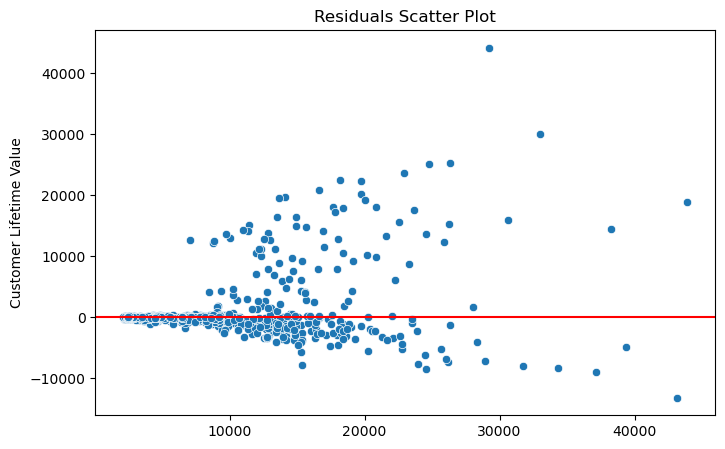

In [48]:
# Scatter plot of residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_residuals, x=y_pred, y=residuals)
plt.axhline(y=0, color='red', label='Zero Line')  # Add a horizontal line at y=0
plt.title('Residuals Scatter Plot')
plt.show()

Interpretasi Grafik:
- Distribusi Residual: Residual tersebar di sekitar garis nol, meskipun terdapat beberapa titik dengan nilai residual yang sangat besar (di atas 20.000 atau di bawah -10.000). Hal ini menunjukkan adanya error prediksi yang cukup signifikan untuk beberapa data.
- Pola pada Residual: Jika residual menunjukkan pola tertentu (misalnya, membentuk kurva atau tren), itu dapat mengindikasikan masalah dalam model, seperti ketidaklinearitas atau varians residual yang tidak homogen (heteroskedastisitas). Dari grafik ini, tampaknya ada indikasi varians residual meningkat seiring dengan nilai prediksi yang lebih tinggi.
- Outlier: Beberapa titik jauh dari garis nol, yang menunjukkan bahwa model mengalami kesulitan memprediksi nilai untuk data tersebut secara akurat.

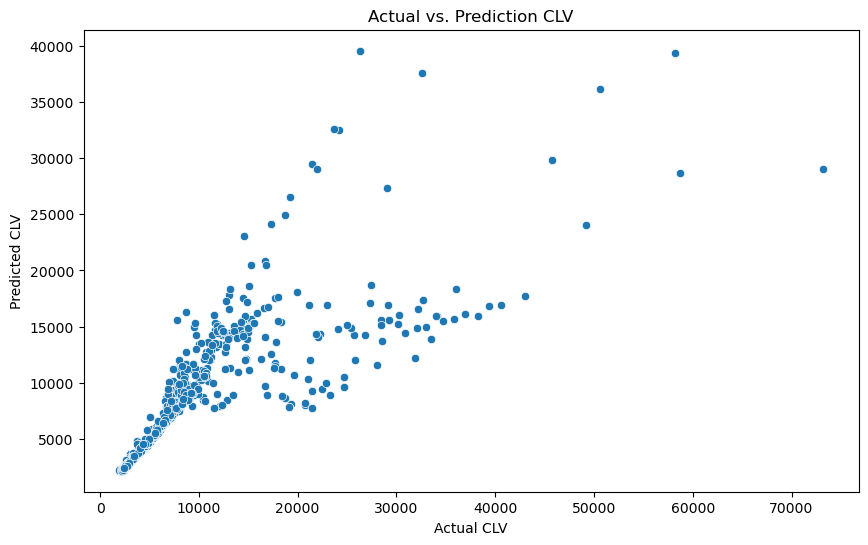

In [49]:

plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual vs. Prediction CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV')

Berdasarkan visualisasi diatas, perbandingan nilai CLV aktual dan prediksi memperlihatkan bahwa model cukup dapat memprediksi nilai CLV dengan baik terutama pada CLV yang bernilai rendah (<10000). Namun karena pada data ini terdapat banyak outlier maka pada nilai CLV yang termasuk outlier yaitu diatas USD 16624.75 memperlihatkan banyak error pada prediksi.

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (CLV), kita dapat mengeceknya melalui function feature_importances.

<Axes: title={'center': 'Feature Importances'}>

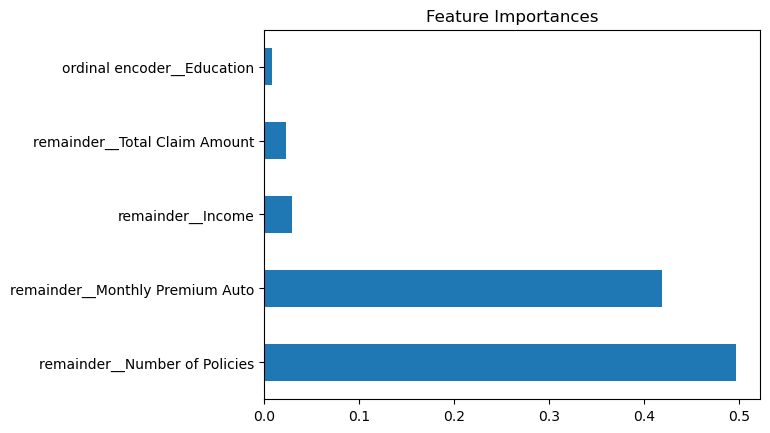

In [50]:
# Plot feature importances
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')

Berdasarkan grafik diatas terlihat bahwa fitur Number of Policies dan Monthly Premium Auto adalah 2 fitur yang paling berpengaruh dalam model RandomForest atau dalam memprediksi nilai CLV menggunakan pemodelan yang telah dilakukan ini.

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'Number of Policies' dan 'Monthly Premium Auto' menjadi fitur yang paling berpengaruh terhadap 'CLV'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~9%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan CLV pada rentang nilai seperti yang dilatih terhadap model (maksimal CLV USD 16624.75), maka perkiraan CLVnya rata-rata akan meleset kurang lebih sebesar 9% dari CLV seharusnya. 
 
 Berdasarkan analisis feature importances, fitur Number of Policies dan Monthly Premium Auto memiliki pengaruh paling signifikan terhadap model dalam memprediksi nilai Customer Lifetime Value (CLV). Kedua fitur ini memberikan kontribusi sangat tinggi, sehingga fitur lain menjadi terlihat kurang signifikan.

 Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan pendapatan dari CLV. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.

### **Recommendations**

**Segi Data:**

**1. Menambah Jumlah Data**: Dengan memperluas dataset pelatihan, model dapat belajar dari lebih banyak variasi pola, sehingga mengurangi risiko overfitting dan meningkatkan akurasi prediksi. 

**2. Menambahkan Fitur Relevan**: Memperkaya dataset dengan fitur-fitur seperti durasi pelanggan menjadi nasabah, informasi alamat, dan lainnya dapat memberikan konteks tambahan yang membantu model dalam memprediksi nilai CLV dengan lebih baik. 

**3. Mengembangkan Model Klasifikasi Loyalitas Pelanggan**: Dengan mengkategorikan nilai CLV menjadi dua kelas—pelanggan loyal dengan CLV tinggi dan tidak loyal dengan CLV rendah—dapat dibangun model klasifikasi yang membantu dalam segmentasi pelanggan dan pengambilan keputusan strategis. 

**4. Membangun Model Prediksi untuk Premi Bulanan**: Menganalisis faktor-faktor yang mempengaruhi besarnya premi bulanan yang dibayarkan pelanggan dengan menjadikan **Monthly Premium Auto** sebagai variabel dependen dapat memberikan wawasan berharga. Hal ini membantu dalam merancang strategi penetapan harga dan penawaran produk yang lebih efektif.

Dengan menerapkan langkah-langkah di atas, perusahaan asuransi dapat meningkatkan akurasi model prediksi CLV, memahami perilaku pelanggan dengan lebih baik, dan merancang strategi pemasaran yang lebih tepat sasaran. 

**Segi Bisnis:**

**1. Strategi Berdasarkan Fitur Number of Policies**

Meningkatkan Jumlah Polis yang Dimiliki Pelanggan:
Diskon atau Bundling Produk:
Tawarkan diskon bagi pelanggan yang membeli lebih dari satu jenis polis asuransi (contoh: bundling antara asuransi mobil, rumah, atau kesehatan).
Loyalty Program:
Berikan insentif (poin, cashback, atau hadiah) kepada pelanggan yang memperbarui atau menambah polis asuransi mereka.
Promosi Cross-Selling:
Edukasi pelanggan tentang manfaat memiliki beberapa polis asuransi dengan menawarkan solusi yang relevan untuk kebutuhan mereka.

**2. Strategi Berdasarkan Fitur Monthly Premium Auto**

Mengelola Premi Asuransi Bulanan:
Diskon untuk Pembayaran Tahunan:
Berikan potongan harga jika pelanggan memilih membayar premi secara tahunan, yang dapat meningkatkan nilai CLV sekaligus mengurangi risiko churn.
Penawaran Premi Berbasis Segmentasi:
Sesuaikan premi bulanan berdasarkan profil risiko pelanggan, sehingga premi terasa lebih terjangkau namun tetap menguntungkan perusahaan.
Kampanye Edukasi:
Tingkatkan pemahaman pelanggan tentang manfaat perlindungan asuransi yang sepadan dengan premi bulanan mereka untuk mencegah keraguan atau pembatalan.

**3. Strategi Gabungan**

Targeting Pelanggan dengan Potensi CLV Tinggi:
Gunakan segmentasi berbasis data untuk mengidentifikasi pelanggan yang memiliki potensi tinggi dalam meningkatkan jumlah polis atau premi bulanan.
Personalized Marketing:
Kirimkan penawaran khusus yang disesuaikan dengan kebutuhan masing-masing pelanggan, seperti rekomendasi polis tambahan yang relevan atau premi lebih fleksibel.

**4. Optimalisasi Pengalaman Pelanggan**

Peningkatan Layanan Pelanggan:
Pastikan pengalaman klaim dan pembelian polis mudah dan cepat untuk meningkatkan kepercayaan pelanggan.
Digital Engagement:
Gunakan aplikasi atau portal online yang memungkinkan pelanggan memantau polis mereka, memperbarui informasi, atau membeli produk baru dengan mudah.

****

### **Save Model**

In [52]:
# Save model
import pickle

In [54]:
estimator = Pipeline([('preprocess', transformer), ('model', RandomForestRegressor())])
estimator.fit(X, y)

pickle.dump(estimator, open('Model_CLV_RF.sav', 'wb'))